In [51]:
# import 및 버전 확인
import tensorflow as tf
tf.__version__

'2.7.0'

In [52]:
# 변수 선언
x = tf.Variable([1.0, 2.0, 3.0])

In [53]:
# 변수의 shape 확인 --> 3차원 이상 : Tensor라고 부른다.
x.shape

TensorShape([3])

In [54]:
# numpy 변수로 바꿀 수 있다.
x.numpy()

array([1., 2., 3.], dtype=float32)

### 선형 모형

In [55]:
#### 딥러닝, 머신 러닝 등에서 가장 기본적은 선형 모형(linear model)입니다.
#### 데이터가 직선 형태를 이루고 있을 것이라고 가정하기 때문에 선형 모형이라고 합니다.
#### 선형 모형을 수식으로 나타내면 다음과 같은 직선의 방정식 형태가 됩니다.

# y=wx+b

#### (x 와 y는 데이터입니다. w는 직선의 기울기입니다. 가중치(weight)나 계수(coefficient)라고도 합니다.)

In [56]:
#### 시불변(시간에 따라 결과값이 변하지 않음) 조건이 성립하고, 입력을 2배 늘렸을 때, 출력 값도 그에 비례해서 나타나면 선형.

In [57]:
import seaborn as sns

In [58]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/Users/formulate/miniforge3/envs/tf/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

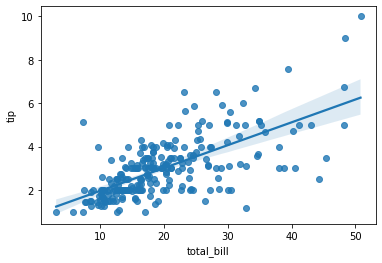

In [59]:
sns.regplot('total_bill', 'tip', tips)

## 텐서플로를 이용해 선형 모형 만들기

In [60]:
import tensorflow as tf

텐서플로에서 keras는 다양한 모형을 쉽게 만들 수 있는 방법을 제공합니다. 먼저 Sequential을 이용해 빈 모형을 만듭니다.

In [61]:
model = tf.keras.models.Sequential()

다음으로 레이어(layer)를 만듭니다. 레이어는 어떤 x를 입력 받아, y를 출력하는 형태의 계산을 표현합니다.
선형 모형은 y=wx+b 형태의 계산인데, 이런 계산은 Dense 레이어를 사용합니다.

In [62]:
layer = tf.keras.layers.Dense(1, input_shape=(1,))

In [63]:
model.add(layer)

이제 앞서 만들어둔 데이터로 선형 모형을 학습시켜보겠습니다.
여기서 모형을 학습시킨다는 것은 데이터를 통해 w와 b의 적절한 값을 알아낸다는 것입니다.
현재는 우리가 손으로 만든 데이터이기 때문에 w와 b가 각각 2, 1이라는 것을 알고 있지만 실제 데이터의 경우에는 학습을 통해 알아내야 합니다.

학습시키기 전에 먼저 모형을 설정해야 합니다.
optimizer는 모형을 적합시키는 알고리즘입니다.
여기서는 어떤 알고리즘을 쓰더라도 큰 차이가 없기 때문에 가장 간단한 sgd를 사용하겠습니다.

In [64]:
# loss는 학습한 w와 b를 이용해서 wx+b를 계산한 값과 실제 y의 오차를 구해서 모형의 정확성을 측정하는 방법 입니다.
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01), loss='mse')

/Users/formulate/miniforge3/envs/tf/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [65]:
x = tips['total_bill'].values
y = tips['tip'].values

result = model.fit(x, y, epochs=30, verbose=1) # verbose 0: 상세출력 안함, verbose 1: 상세정보 출력

#### 학습에서 한 번의 과정을 epoch라고 합니다.
#### epoch를 늘리면 학습을 더 많이 하므로 파라미터가 좀 더 정확하게 추정될 것입니다.
#### 여기서는 30 epoch를 설정했습니다.

Epoch 1/30
1/8 [==>...........................] - ETA: 0s - loss: 637.4875

2022-02-12 14:49:39.575548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 4ms/step - loss: 582.9594
Epoch 2/30
8/8 [==============================] - 0s 4ms/step - loss: 501.2441
Epoch 3/30
8/8 [==============================] - 0s 3ms/step - loss: 425.9021
Epoch 4/30
8/8 [==============================] - 0s 4ms/step - loss: 358.8824
Epoch 5/30
8/8 [==============================] - 0s 4ms/step - loss: 300.2292
Epoch 6/30
8/8 [==============================] - 0s 4ms/step - loss: 247.1780
Epoch 7/30
8/8 [==============================] - 0s 3ms/step - loss: 203.1497
Epoch 8/30
8/8 [==============================] - 0s 4ms/step - loss: 165.3113
Epoch 9/30
8/8 [==============================] - 0s 4ms/step - loss: 133.3403
Epoch 10/30
8/8 [==============================] - 0s 4ms/step - loss: 105.8441
Epoch 11/30
8/8 [==============================] - 0s 3ms/step - loss: 84.3771
Epoch 12/30
8/8 [==============================] - 0s 3ms/step - loss: 65.2430
Epoch 13/30
8/8 [==============================] - 0s 4ms/step

#### 학습된 파라미터를 확인합니다. 첫번째 파라미터가 w에 해당하는 값이고, 두번째가 b에 해당하는 값입니다.

In [66]:
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.08527895]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([1.0974238], dtype=float32)>]

In [67]:
import matplotlib.pyplot as plt

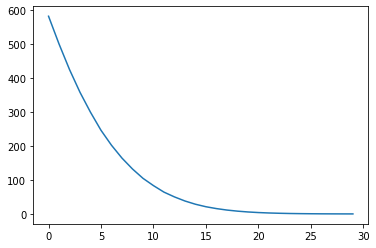

In [69]:
plt.plot(result.history['loss'])
